# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/data.csv')
display(data.head(20))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Пояснения к названиям колонок
* children — количество детей в семье
* days_employed — общий трудовой стаж в днях
* dob_years — возраст клиента в годах
* education — уровень образования клиента
* education_id — идентификатор уровня образования
* family_status — семейное положение
* family_status_id — идентификатор семейного положения
* gender — пол клиента
* income_type — тип занятости
* debt — имел ли задолженность по возврату кредитов
* total_income — ежемесячный доход
* purpose — цель получения кредита

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Вывод**

Предварительный обзор данных показал следующее:
* таблица состоит из 12 колонок и 21525 строк,
* объем памяти, занимаемый таблицей, немногим более 2 мегабайт (это немного),
* названия колонок соответствуют к "змеиному стилю",
* тип переменных в колонках в большинстве случаев соответствует их содержанию.

Вместе с тем при первом знакомстве с таблицей определяются первые вопросы, требующие проверки и уточнений:
* данные по рабочему стажу и совокупному доходу заполнены не во всех строках (отсутствует примерно 10% данных - это существенно),
* графа `days_employed`, которая должна содержать данные о трудовом стаже в днях, имеет формат `float` (что не вполне естественно), а также отрицательные значения (дни безработности?),
* на примере графы "образование" видно, что строковые данные в таблице содержат различные регистры,
* данные об образовании и семейеном статусе имеют дублирование: одновременно пристутствуют текстовое и кодовое значения (следует проверить корректность дублирования).

Кстати, даже по первым 10 строкам можно предположить, что отрицательные значения в столбце `days_employed` связаны с тем, что данное физическое лицо является либо сотрудником банка, либо лицом, связанным с ним. Если так, то это особый случай, и данные по таким заещикам не помогут в создании скорнинговой модели, которая и является конечной целью анализа.

Однако эти и другие особенности и гипотезы будут проработаны на следующем этапе.

## Шаг 2. Предобработка данных

### Обработка пропусков

Несмотря на видимую "адекватность" заголовков в изначальной таблице, проверим их на предмет невидимых аномалий (вроде лишних пробелов).

In [3]:
data.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

Все в порядке с заголовкам. Оставляем как есть!

Теперь проблема с разнорегистровыми строковыми данными. Мы уже знаем, что есть и слова с первыми заглавные буквами, и слова, полностью написанные заглавными. Такие слова видны в одной колонке (`education`). Проверим и остальные (надо ли их править). Заодно посмотрим и на разнообразие данных в каждой колонке.

In [4]:
list_of_columns = ['education', 'family_status', 'gender', 'income_type', 'purpose']
for column in list_of_columns:
    print(column, '\n', data[column].value_counts(), '\n')

education 
 среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64 

family_status 
 женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64 

gender 
 F      14236
M       7288
XNA        1
Name: gender, dtype: int64 

income_type 
 сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtyp

Видим, что непорядок с регистром только в колонках `education`и `family_status` (причем в последнем случае только один вариант с заглавной буквой, и хотя он не скажется на агрегации результатов, всё-таки приведем и его к единой стилистике).

В свою очередь, в столбце `gender` заглавные буквы вполне можно оставить.
Заметим сразу, что это единственный строковый столбец с неопределенным значением (полом). При этом половая принадлежность не является фактором исследования, поэтому пока достаточно будет заменить ее на более стандартный вариант (unknown).

Сделаем всё это последовательно, но сразу с проверкой результата.

In [5]:
data['education'] = data['education'].str.lower()
print(data['education'].value_counts())

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64


In [6]:
print(data['family_status'].value_counts())
data['family_status'] = data['family_status'].replace('Не женат / не замужем', 'не женат / не замужем')

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64


In [7]:
data['gender'] = data['gender'].replace('XNA', 'unknown')
print(data['gender'].value_counts())

F          14236
M           7288
unknown        1
Name: gender, dtype: int64


В итоге результаты приведения к нижнему регистру соответствуют ожидаемым.

Снова посмотрим (теперь явным образом) на пропуски в базовой таблице.

In [8]:
print(data.isna().sum())

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


Количество пропусков в двух столбцах одинаковое. Проверим, существует ли корреляция межу этими пропусками. Для этого проверим, соответствуют ли пропускам в days_employed какие-либо значения total_income. Используем логическую индексацию.

In [9]:
data.loc[data['days_employed'].isna()]['total_income'].count()

0

Таким образом, ни в одной строке из множества пустых данных по трудовому стажу нет ни одного значения я графе с полным доходом. А это значит, что пропуски совпадают и с очень высокой вероятностью отсутствие данных в этих столбцах связано между собой. Проверим, связано ли отсутствие данных в этих графах с видом занятости.

In [10]:
data.loc[data['days_employed'].isna()]['income_type'].unique()

array(['пенсионер', 'госслужащий', 'компаньон', 'сотрудник',
       'предприниматель'], dtype=object)

Из 8 категорий занятости присутствуют 6, причем госслужащий, компаньон и сотрудник массово представлены в базе данных. То есть связи с наиболее "подозрительной" категорией нет.
На всякий случай проверим другие корреляции (есть или нет).

In [11]:
data.loc[data['days_employed'].isna()]['family_status'].unique()

array(['гражданский брак', 'женат / замужем', 'не женат / не замужем',
       'вдовец / вдова', 'в разводе'], dtype=object)

In [12]:
data.loc[data['days_employed'].isna()]['children'].unique()

array([ 0,  1,  2, -1,  3,  4, 20,  5])

In [13]:
data.loc[data['days_employed'].isna()]['education'].unique()

array(['среднее', 'высшее', 'неоконченное высшее', 'начальное'],
      dtype=object)

In [14]:
data.loc[data['days_employed'].isna()]['debt'].unique()

array([0, 1])

In [15]:
data.loc[data['days_employed'].isna()]['gender'].unique()

array(['M', 'F'], dtype=object)

Таким образом, связь не обнаружена по всем признакам ни по одной из категорий. (Попутно обнаружена некорректность с отрицательным числом детей, а также с подозрительно большим числом 20, но этим в любом случае займемся позже.) Как бы то ни было, логических связей нет. Поэтому будем руководствоваться гипотезой о том, что при отсутствии дохода (который может быть следствием намеренного незаполнения таких данных о себе, т.е. неслучайным) программа формирования базы данных делает неактивным поле с трудовым стажем. То есть первичная причина (пропуск дохода) неслучайная, а пропуск стажа - техническая недоработка (случайная).

Тем не менее, обрабатывать пропуск надо будет по-разному (исходя из качества этих пропусков, а главное - их значимости для решения конечных задач)

Начнем работу над пропусками с колонки **days_employed**, но сначала резберемся с положительными и отрицательными значениями дней в формате float. Скорее всего, решение этого вопроса позволит найти некоторую унификацию с заполнением пропусков.
Итак, проблематика:
* положительные и отрицательные,
* положительные, как кажется, могут быть значительно больше отрицательных (по модулю),
* целочисленные по смыслу величины представлены десятичными дробями.

При первом взгляде на исходную таблицу можно предположить, что положительность и отрицательность трудового стажа как-то связана с типом занятости. Проверим эту гипотезу группировками по типу занятости для положительных и отрицательных значений стажа. Для оценки разброса данных по стажу сразу же посчитаем средние, минимальные и максимальные значения для положительных и отрицательных данных по трудовому стажу.

In [16]:
print(data[data['days_employed'] <= 0].groupby('income_type')['income_type'].count(), '\n')
print('средняя:', data[data['days_employed'] <= 0].groupby('income_type')['days_employed'].mean(), '\n')
print('минимум:', data[data['days_employed'] <= 0].groupby('income_type')['days_employed'].min(), '\n')
print('максимум:', data[data['days_employed'] <= 0].groupby('income_type')['days_employed'].max())

income_type
в декрете              1
госслужащий         1312
компаньон           4577
предприниматель        1
сотрудник          10014
студент                1
Name: income_type, dtype: int64 

средняя: income_type
в декрете         -3296.759962
госслужащий       -3399.896902
компаньон         -2111.524398
предприниматель    -520.848083
сотрудник         -2326.499216
студент            -578.751554
Name: days_employed, dtype: float64 

минимум: income_type
в декрете          -3296.759962
госслужащий       -15193.032201
компаньон         -17615.563266
предприниматель     -520.848083
сотрудник         -18388.949901
студент             -578.751554
Name: days_employed, dtype: float64 

максимум: income_type
в декрете         -3296.759962
госслужащий         -39.954170
компаньон           -30.195337
предприниматель    -520.848083
сотрудник           -24.141633
студент            -578.751554
Name: days_employed, dtype: float64


In [17]:
print(data[data['days_employed'] > 0].groupby('income_type')['income_type'].count(), '\n')
print(data[data['days_employed'] > 0].groupby('income_type')['days_employed'].mean(), '\n')
print('минимум:', data[data['days_employed'] > 0].groupby('income_type')['days_employed'].min(), '\n')
print('максимум:', data[data['days_employed'] > 0].groupby('income_type')['days_employed'].max())

income_type
безработный       2
пенсионер      3443
Name: income_type, dtype: int64 

income_type
безработный    366413.652744
пенсионер      365003.491245
Name: days_employed, dtype: float64 

минимум: income_type
безработный    337524.466835
пенсионер      328728.720605
Name: days_employed, dtype: float64 

максимум: income_type
безработный    395302.838654
пенсионер      401755.400475
Name: days_employed, dtype: float64


В итоге видим следующее:
* положительный стаж только у пенсионеров и безработных,
* отрицательный - у всех остальных категорий,
* положительный стаж пенсионеров и безработных не является реальным, т.к. близок к 1000 годам без существенного разброса данных,
* отрицательный стаж вполне правдоподобен по величинам и их разбросу (если убрать отрицательный знак).

Гипотезы (предположения):
* положительные и отрицательные данные взяты из разных источников,
* отрицательные данные содержат в себе следы некорректной выгрузки, когда дефис (тире) перед числом стало знаком минус перед числом,
* наличие 6-разрядной дробной части в количестве дней может быть:
1) следствием выполнения расчета с учетом часов и минут, прошедших после начала текущих суток,
2) следствием ошибочного затягивания вместе с графой "стаж" какой-то второй графы, которая прилепилась к основной выгрузке дней трудового стажа; однако первая гипотеза более "технична", а потому правдоподобна,
* положительные данные (пенсионеры и безработные) получились в результате ошибочного подтягивания в единую таблицу какой-то иной графы, отличной от стажа.

Не имея возможности проверить предположения, исходим из следующего:
* данные о трудовом стаже не являются ключевыми при ответе на вопросы данной работы (то есть не играют роли в предстоящем анализе),
* данные о трудовом стаже пенсионеров и безработных являются недостоверными, и в рамках имеющейся таблицы не существует опорных данных, на основе которых косвенным образом можно было рассчитать оценочную величину стажа,
* данные о стаже пенсионеров и безработных вместе с пропущенными данными осоставляют значительную часть базы (26,1%).

Поэтому:
* положительные, но недостоверные данные признаем отсутствующими и заменяем их на текстову информацию (`no_data`), также поступим и в отношении пропущенных данных о стаже, 
* данные отрицательные обращаем в положительные; при этом учитывая предположения о причинах дробной части в отрицательных значениях, а также предельно незначительную роль часов (и тем более минут) в трудовом стаже окуругляем числовые данные переводом их значений в тип int.

В итоге получится столбец со смешанными данными (числовыми и строковыми), но `days_employed` заведомо не подлежит дальнейшей обработке. Однако в таком виде таблица может быть использована в дальнейшем при иных расчетах: пользователи смогут взять достоверные данные, но будут сразу же информированы об отсутствии части данных, а корректные данные уже будут подготовлены для дельнейшего применения.

(При этом строковые данные увеличат объем занимаемой памяти, а целочисленные будут способствовать сокращению этого объема.)

In [18]:
data.loc[data['days_employed'] > 0, 'days_employed'] = 'no_data'
print(data[data['days_employed'] == 'no_data'].groupby('income_type')['income_type'].count())

income_type
безработный       2
пенсионер      3443
Name: income_type, dtype: int64


In [19]:
for index in range(len(data['days_employed'])): # Мы, конечно, знаем длину (21525), но вдруг в ходе работы исходные данные дополнятся
    if data.loc[index, 'days_employed'] != 'no_data':
        if data.loc[index, 'days_employed'] < 0:
            data.loc[index, 'days_employed'] = -int(data.loc[index, 'days_employed'])
print(data['days_employed'].value_counts())

no_data    3445
327          16
133          16
438          15
204          14
           ... 
4265          1
4256          1
4255          1
4249          1
8200          1
Name: days_employed, Length: 5717, dtype: int64


Количество `no_data` совпадает с суммой пенсионеров и безработных (что и ожидалось), а остальные значения стали положительными и целочисленными (что и требовалось).

Раз no_data вынужденно стала на место недостоверных данных у пенсионеров и безработных, то так же мы поступим и с пропущенными значениями в этой колонке (их 2174): заполним их как no_data (в данном случае это будет признаком отсутствия достоверных данных).

In [20]:
data.loc[data['days_employed'].isna(), 'days_employed'] = 'no_data'
print(data['days_employed'].value_counts())

no_data    5619
327          16
133          16
438          15
204          14
           ... 
4265          1
4256          1
4255          1
4249          1
8200          1
Name: days_employed, Length: 5717, dtype: int64


Число позиций `no_data` соответствует ожидаемому. В результате такой маркировки недостоверных и пропущенных данных их оказалось более четверти(!). Это более чем существенная величина. Анализ с такими пропусками мог бы привести к существенному искажению результата. Но графа не будет использоваться в дальнейшем.
Итак, с этим столбцом закончили.

Теперь перейдем к графе **total_income**. Здесь предстоит заполнение пропусков и округление дохода до целого (так как значения копеек являются избыточными).

Пропуски в этой графе значимы для дальнейшей работы. Полностью удалять их означало бы существенно понизить точность расчетов из-за сжатия базы. Заполнять пропуски в данном столбце логичнее всего по медианному значению. Но попробуем это сделать более аккуратным образом - по на основе медианы по каждой группе по виду дохода.

In [21]:
data['total_income'] = data['total_income'].fillna(data.groupby('income_type')['total_income'].transform('median'))
print(data.isna().sum())

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64


Пропусков данных в столбце `total_income` больше нет.

Теперь настало время выправить данные в столбце **children**.

In [22]:
print(data.groupby('children')['children'].count())

children
-1        47
 0     14149
 1      4818
 2      2055
 3       330
 4        41
 5         9
 20       76
Name: children, dtype: int64


Подозрительны -1 и 20. Причем, судя по количеству таких случаев, это не единичные сбои. Проверим корреляции со статусом занятости, семейным положением, полом и целями кредитования.

In [23]:
print(data.groupby(['children', 'income_type']).agg({'income_type':'count'}))

                          income_type
children income_type                 
-1       госслужащий                4
         компаньон                  9
         пенсионер                  8
         сотрудник                 26
 0       безработный                1
         госслужащий              866
         компаньон               3142
         пенсионер               3537
         предприниматель            2
         сотрудник               6600
         студент                    1
 1       безработный                1
         госслужащий              355
         компаньон               1300
         пенсионер                275
         сотрудник               2887
 2       в декрете                  1
         госслужащий              188
         компаньон                529
         пенсионер                 20
         сотрудник               1317
 3       госслужащий               36
         компаньон                 79
         пенсионер                  6
         сот

In [24]:
print(data.groupby(['children', 'family_status']).agg({'family_status':'count'}))

                                family_status
children family_status                       
-1       в разводе                          4
         вдовец / вдова                     4
         гражданский брак                   5
         женат / замужем                   29
         не женат / не замужем              5
 0       в разводе                        784
         вдовец / вдова                   848
         гражданский брак                2752
         женат / замужем                 7500
         не женат / не замужем           2265
 1       в разводе                        312
         вдовец / вдова                    77
         гражданский брак                 998
         женат / замужем                 2982
         не женат / не замужем            449
 2       в разводе                         81
         вдовец / вдова                    20
         гражданский брак                 344
         женат / замужем                 1535
         не женат / не замужем    

In [25]:
print(data.groupby(['children', 'gender']).agg({'gender':'count'}))

                  gender
children gender         
-1       F            35
         M            12
 0       F          9570
         M          4578
         unknown       1
 1       F          3094
         M          1724
 2       F          1259
         M           796
 3       F           196
         M           134
 4       F            28
         M            13
 5       F             7
         M             2
 20      F            47
         M            29


In [26]:
print(data.groupby(['children', 'purpose']).agg({'purpose':'count'}))

                                                 purpose
children purpose                                        
-1       автомобили                                    1
         автомобиль                                    2
         высшее образование                            1
         дополнительное образование                    2
         жилье                                         1
...                                                  ...
 20      свой автомобиль                               3
         сделка с подержанным автомобилем              4
         строительство жилой недвижимости              1
         строительство собственной недвижимости        6
         сыграть свадьбу                               4

[246 rows x 1 columns]


Никаких корреляций установить не удалось. В такой ситуации необходимо связаться с теми специалистами, которые формируют базу. Наверняка, и -1, и 20 имеют какой-то смысл. Уж очень четко они отделены от других значений. Как будто это какая-то кодировка отдельных специфических случаев. Но выяснить не у кого.

При этом общее число неясных данных составляет 123, т.е. менее 0,6% от общей базы. Поэтому корректнее всего будет пожертвовать этими строками, чтобы не искажать конечные выводы (ведь исследуется в том числе зависимость от количества детей).

Итак, исключаем эти строки и проверяем результат.

In [27]:
data = data.drop(data[data['children'] == -1].index)
data = data.drop(data[data['children'] == 20].index)
print(data.groupby('children')['children'].count())
data.info()

children
0    14149
1     4818
2     2055
3      330
4       41
5        9
Name: children, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21402 entries, 0 to 21524
Data columns (total 12 columns):
children            21402 non-null int64
days_employed       21402 non-null object
dob_years           21402 non-null int64
education           21402 non-null object
education_id        21402 non-null int64
family_status       21402 non-null object
family_status_id    21402 non-null int64
gender              21402 non-null object
income_type         21402 non-null object
debt                21402 non-null int64
total_income        21402 non-null float64
purpose             21402 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 2.1+ MB


**Вывод**

* В таблице устранены пропуски в столбцах 'days_employed' и 'total_income'.
* При этом в столбце 'days_employed' недостоверные и отсутствующие данные заменены на текстовый признак "no_data", а числовые значения, не вызвавшие подозрений округлены до целых значений путем перевода в целочисленный формат.
* В столбце 'gender' в единственной ячейке с неопределенным полом установлено значение "unknown".
* Удалены строки с недостоверными данными в столбце 'children' (менее 0,06% базы).

### Замена типа данных

Замена типа данных в графе `days_employed` была произведена ранее, при обработке пропусков.
Теперь обработаем (переведем в целочисленный формат) данные в колонке `total_income`.

При этом округление путем перевода значений в целочисленные показатели (с простым отсечением дробной части) будет вполне достаточным в данном случае с точки зрения точности (количества остающихся значащих цифр более чем достаточно). При этом формат int позволит уменьшить потребный объем памяти.

In [28]:
data['total_income'] = data['total_income'].astype('int')
print(data['total_income'].head())

0    253875
1    112080
2    145885
3    267628
4    158616
Name: total_income, dtype: int64


Просмотр первых строк стобца показал, что функция отработала корректно.

**Вывод**

Перевод в целочисленный формат выполнен в столбцах:
* `days_employed` (в части достоверных значений - в разделе 2.1)
* `total_income` (в данном разделе 2.2)

### Обработка дубликатов

#### Явные дубликаты

In [29]:
print(data.duplicated().sum())

71


Да, вроде 71 дубль. Но! К сожалению, в базе нет никаких клиентских идентификаторов, которые могли бы быть главным критерием уникальности строк в таблице. Единственный аналог - уровень заработной платы до заполнения отсутствующих данных средними значениями по группам и до округления этого параметра. До преобразований таких совпадений не было. В силу этого обстоятельства мы можем с уверенностью считать, что повторов в таблице не было изначально.

Но проверим что сейчас.

In [30]:
print(data['total_income'].value_counts())

142594    1101
172357     505
118514     411
150447     146
121931       3
          ... 
156662       1
130037       1
379891       1
278863       1
264193       1
Name: total_income, Length: 18504, dtype: int64


Да, общее число повторов в величине суммарного дохода ожидаемо соответствует количеству заполнений отсутствоваших данных. То есть дубликаты сформировались именно в результате работы над пропусками и интования чисел с округлением (в первую очередь при заполнении пропусков доходов по медианным значениям).

Таким образом, у нас нет оснований для исключения 71 строки. Это повторы (случаи с совпадающими параметрами), но не дубли.

#### Неявные дубликаты

Частично неявные дубликаты были устранены при приведении графы `education` к единому нижнему регистру.

Наиболее вероятная причина появления различных регистров в этой графе - ввод данных вручную (без всплывающих подсказок) и отсутствие при этом жесткого регламента ввода. Поэтому встречались различные варианты написания

Второй источник неявного дублирования смыслов (но не данных) - достаточно произвольные строки в целях кредитования. Причина такого разнообразия - также отсутствие регламентированного набора допустимых вариантов на этапе ввода данных из заявлений клиентов в базу данных банка.

Проведем унификацию целей кредитования, сохраняя максимально изначальный смысл.

In [31]:
print(data['purpose'].value_counts())

свадьба                                   796
на проведение свадьбы                     772
сыграть свадьбу                           769
операции с недвижимостью                  673
покупка коммерческой недвижимости         661
покупка жилья для сдачи                   651
операции с жильем                         648
операции с коммерческой недвижимостью     646
жилье                                     642
покупка жилья                             641
покупка жилья для семьи                   640
недвижимость                              632
строительство собственной недвижимости    628
операции со своей недвижимостью           626
строительство жилой недвижимости          622
строительство недвижимости                620
покупка своего жилья                      619
покупка недвижимости                      619
ремонт жилью                              609
покупка жилой недвижимости                603
на покупку своего автомобиля              504
заняться высшим образованием      

Сформируем функцию и списки соответствий, с которыми будет работать функция.

Главная проблема при сохранении изначального смысла - вложенность множеств. Например, "приобретение жилья" может включать в себя и приобретение коммерческой недвижимости, и приобретение жилья в личных целях. В таких случаеях объединение всех таких позиций в одну "высокоуровневую" лишило бы базу конкретной информации, содержащейся в описании цели "низкого уровня" (например, уточнения о коммерческом характере недвижимости). В этой связи будет объединять высокоуровневые описания с высокооуровневыми, а низкоуровневые - с низкоуровневыми.

Вторая проблема - отсутствие трактовок целей. Например, равны ли юридически и фактически "покупка жилья для сдачи" и "покупка коммерческой недвижимости". В таких случаях, не желая невольно уничтожить часть информации, будем трактовать такие ситуации в пользу их нетождественности, то есть не будем объединять в единую категорию.

In [32]:
def replace_purposes(wrong_purposes, correct_purposes):
    for wrong_purpose in wrong_purposes:
        data['purpose'] = data['purpose'].replace(wrong_purposes, correct_purposes)
        
wrong = [['на проведение свадьбы', 'сыграть свадьбу'],
         ['заняться образованием', 'заняться образованием', 'получение образования'], 
         ['получение дополнительного образования'], 
         ['получение высшего образования', 'заняться высшим образованием'],
         ['автомобиль', 'автомобили', 'сделка с автомобилем', 'свой автомобиль', 'на покупку автомобиля', 'на покупку своего автомобиля', 'приобретение автомобиля'],
         ['сделка с подержанным автомобилем', 'на покупку подержанного автомобиля'],
         ['ремонт жилью'],
         ['покупка жилья', 'покупка своего жилья', 'жилье', 'покупка жилья для семьи', 'покупка жилой недвижимости'],
         ['недвижимость'],
         ['операции со своей недвижимостью'],
         'строительство собственной недвижимости']
correct = ['свадьба',
          'образование',
          'дополнительное образование',
          'высшее образование',
          'покупка автомобиля',
          'покупка подержаного автомобиля',
          'ремонт жилья',
          'покупка жилья',
          'покупка недвижимости',
          'операции с недвижимостью',
          'строительство недвижимости']

for index in range(len(wrong)):
    replace_purposes(wrong[index], correct[index])
    
print(data['purpose'].value_counts())

покупка автомобиля                       3332
покупка жилья                            3145
свадьба                                  2337
высшее образование                       1368
операции с недвижимостью                 1299
образование                              1295
покупка недвижимости                     1251
строительство недвижимости               1248
покупка подержаного автомобиля            956
дополнительное образование                902
покупка коммерческой недвижимости         661
покупка жилья для сдачи                   651
операции с жильем                         648
операции с коммерческой недвижимостью     646
строительство жилой недвижимости          622
ремонт жилья                              609
профильное образование                    432
Name: purpose, dtype: int64


**Вывод**

Таким образом, в данной базе данных нет проблемы с явнными дубликатами, а проблема неявного дублирования решена ранее (при обработке столбца 'education') сейчас при ручной обработке неявных дубликатов в столбце 'purpose'.

После устранения неявных дубликатов работа с данными станет значительно проще и логичней.

### Лемматизация

Лемматизировать предстоит столбец 'purpose' (именно тот, в котором только что были исключены неявные дубликаты).

In [33]:
from pymystem3 import Mystem
m = Mystem()

Лемматизацию проведем в три этапа:
* сформируем список уникальных целей кредитования,
* сформируем список лемм,
* сформируем список уникальных лемм.

Расчет частоты употребления ключевых слов (лемм) на данном не имеет практического значения.

In [34]:
list_of_purposes = data['purpose'].unique()

In [35]:
all_lemmas = m.lemmatize(' '.join(list_of_purposes))

In [36]:
lemmas = []
for lemma in all_lemmas:
    if lemma not in lemmas:
        lemmas.append(lemma)
print(lemmas)

['покупка', ' ', 'жилье', 'автомобиль', 'дополнительный', 'образование', 'свадьба', 'операция', 'с', 'недвижимость', 'коммерческий', 'строительство', 'подержаный', 'жилой', 'высокий', 'профильный', 'для', 'сдача', 'ремонт', '\n']


**Вывод**

В итоге сформирован список уникальных лемм (ключевых слов, использованных при обозначении цели кредита). Он может быть использован в дальнейшем, при категоризации.

### Категоризация данных

Для упрощения работы с данными целесообразно создать три словаря, которые связывали бы:
* уровень образования и его соответствующий код (education и education_id),
* семейное положение и его соответствующий код (family_status и family_status_id),
* цель кредита и леммы целей.

Первые две пары точно дублируют друг друга, а создание третьей позволило бы использовать ключевые слова при работе с целями кредитования.

In [37]:
education_dict = data[['education', 'education_id']]
education_dict = education_dict.drop_duplicates().reset_index(drop=True)
print(education_dict.sort_values(by='education_id'))

             education  education_id
0               высшее             0
1              среднее             1
2  неоконченное высшее             2
3            начальное             3
4       ученая степень             4


In [38]:
family_status_dict = data[['family_status', 'family_status_id']]
family_status_dict = family_status_dict.drop_duplicates().reset_index(drop=True)
print(family_status_dict.sort_values(by='family_status_id'))

           family_status  family_status_id
0        женат / замужем                 0
1       гражданский брак                 1
2         вдовец / вдова                 2
3              в разводе                 3
4  не женат / не замужем                 4


Два очевидных справочника сформированы (по сути они не являются категориальными, но могли бы помочь в дальнейшей работе с таблицей). Создадим третий - собственно категориальный справочник.

На основе итогов лемматизации составим перечень целей кредита с соответствующими ключевыми словами:
   * автомобиль (автомобиль),
   * недвижимость (жилье, недвижимость),
   * образование (образование),
   * свадьба (свадьба)

Для создания нового столбца с категориями создадим и применим функцию одной строки. Результат для оценки выведем на печать.

In [39]:
def create_category_purpose(row):
    lem_purpose = m.lemmatize(row['purpose'])
    if 'автомобиль' in lem_purpose:
        return 'автомобиль'
    elif ('жилье' in lem_purpose) or ('недвижимость' in lem_purpose):
        return 'недвижимость'
    elif ('образование' in lem_purpose):
        return 'образование'
    elif ('свадьба' in lem_purpose):
        return 'свадьба'
    
data['purpose_category'] = data.apply(create_category_purpose, axis=1)

In [52]:
create_category_purpose

<function __main__.create_category_purpose(rows)>

In [40]:
print(data['purpose'], '\n')
print(data['purpose_category'])

0                     покупка жилья
1                покупка автомобиля
2                     покупка жилья
3        дополнительное образование
4                           свадьба
                    ...            
21520             операции с жильем
21521            покупка автомобиля
21522          покупка недвижимости
21523            покупка автомобиля
21524            покупка автомобиля
Name: purpose, Length: 21402, dtype: object 

0        недвижимость
1          автомобиль
2        недвижимость
3         образование
4             свадьба
             ...     
21520    недвижимость
21521      автомобиль
21522    недвижимость
21523      автомобиль
21524      автомобиль
Name: purpose_category, Length: 21402, dtype: object


Да, категоризация проведена в соответствии с замыслом.

**Вывод**

По итогам этапа категоризации сделано:
* сформирована таблица соответствий между уровнем образования и соответствующим кодом,
* сформирована таблица соответствий между семейным положением и соответствующим кодом,
* создан дополнительный столбец с укрупненными категориями целей кредитования (таких категорий всего 4).

## Шаг 3. Ответьте на вопросы

**- Есть ли зависимость между наличием детей и возвратом кредита в срок?**

Наличие или отсутствие задолженности в каждом конкретном случае является категориальной переменной. Однако в совокупности их числовыми значениями (0 и 1) можно оперировать. Так, усредненное значение по совокупности кредитов будет означать частоту просрочки в совокупности кредитов, то есть характеризуют меру невозврата в срок.

Сгруппируем заемщиков по категориям в зависимости от количества детей и посчитаем по каждой группе долю просроченных кредитов.

In [41]:
grouped_data = data.groupby('children').agg({'debt':['count', 'mean']})
print(grouped_data)

           debt          
          count      mean
children                 
0         14149  0.075129
1          4818  0.092154
2          2055  0.094404
3           330  0.081818
4            41  0.097561
5             9  0.000000


**Выводы**

* Уровень просрочки кредитов у бездетных заемщиков (7,5%), несколько ниже, чем у семей с детьми (около 9-9,5%).
* Уровень просрочки при наличии детей практически не зависит от их количества. Единственное непринципиальное исключение - 330 заемщиков с тремя детьми (просрочку допускали 8,2% из них), но в этом случае отклонение невелико, и оно проявилось на пониженной статистической базе, что не позволяет считать его значимым.
* Исключение составляют также 9 заемщиков с пятью детьми, которые не допускали просрочек, но в данном случае статистически это малая выборка.

**- Есть ли зависимость между семейным положением и возвратом кредита в срок?**

In [42]:
grouped_data = data.groupby('family_status').agg({'debt':['count', 'mean']})
grouped_data = grouped_data.sort_values(by=('debt', 'mean'), ascending=False)
print(grouped_data)

                        debt          
                       count      mean
family_status                         
не женат / не замужем   2799  0.097535
гражданский брак        4160  0.092548
женат / замужем        12302  0.075354
в разводе               1189  0.070648
вдовец / вдова           952  0.066176


**Вывод**

Анализ данных показал, что зависимость проблемности заемщиков от их семейного положения достаточно явная.
* Наиболее проблемны неженатые и незамужние. Близки к ним по проблемности состоящие в гражданском браке. Проблемность в этих группах от 9,3% до 9,8%. Этим двум группам следует предъявлять более высокие требования при кредитовании (например, более высокую процентную ставку).
* Женатые (замужние) гораздо более надежны (7,5%).
* Еще лучше показатели у разведенных (7,1%).
* Наименее проблемны вдовцы и вдовы (проблемность составляет всего 6,6%), но доля таких заемщиков среди заемщиков невелика (как и в целом в обществе).

Да, вдовцы и вдовы наиболее предпочтительны, но спрос на кредиты со стороны этой социальной группы невелик, поэтому основной акцент в бизнесе сделать на них не получится.

**- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

Проанализируем данные об уровне проблемоности, опираясь на разбивку клиентов по уровню суммарного дохода.

In [43]:
number_of_steps = 50 # Задаем число шагов диапазона суммарного дохода. Можно менять, если требуется изменить точность (частоту).

beginning_of_steps = data['total_income'].min() - 1 # Увеличиваем диапазон снизу на 1, чтобы упростить алгоритм на границах 
#                                                   первого или последнего интервала (для охвата первого или последнего значения)
end_of_steps = data['total_income'].max()
# end_of_steps = 250000 # Задаем число для уточняющих разовых прогонов по нижним диапазонам (функция возможна, но в ней нет необходимости)
one_step = (end_of_steps - beginning_of_steps) / number_of_steps

data_of_mean_debt = [] # Начало создания списка списков с параметрами гасимости кредитов по группам
left_margin = beginning_of_steps # Да, на первом шаге повторяет beginning_of_steps. Сделано для разделения частей алгоритма. 
for step in range(number_of_steps):
    right_margin = left_margin + one_step
    data_selected = data[data['total_income'] > left_margin] # Отсечение данных слева от "шага"
    data_selected = data_selected[data_selected['total_income'] <= right_margin] # Отсечение данных справа от "шага"
    mean_debt = data_selected['debt'].mean() # Вычисление среднего по диапазону в "шаге"
    number_of_cases = data_selected['debt'].count() # Вычисление количества случаев в диапазоне
    data_of_step = [left_margin, right_margin, mean_debt, number_of_cases]
    data_of_mean_debt.append(data_of_step)
    left_margin += one_step    

names_of_columns = ['left_margin', 'right_margin', 'mean_debt', 'number_of_cases']
df_of_mean_debt = pd.DataFrame(data=data_of_mean_debt, columns=names_of_columns)

# Приведем границы суммарного дохода к тысячам рублей - для читабельности
df_of_mean_debt['left_margin'] = df_of_mean_debt['left_margin'] / 1000
df_of_mean_debt['right_margin'] = df_of_mean_debt['right_margin'] / 1000

# Посчитаем среднюю величину дохода в локальном диапазоне
df_of_mean_debt['mean_income'] = (df_of_mean_debt['right_margin'] + df_of_mean_debt['left_margin'])/2

print(df_of_mean_debt)

    left_margin  right_margin  mean_debt  number_of_cases  mean_income
0      20.66600      65.56476   0.068844             1133     43.11538
1      65.56476     110.46352   0.084157             4551     88.01414
2     110.46352     155.36228   0.085501             6573    132.91290
3     155.36228     200.26104   0.086040             4126    177.81166
4     200.26104     245.15980   0.073077             2080    222.71042
5     245.15980     290.05856   0.063369             1294    267.60918
6     290.05856     334.95732   0.079805              614    312.50794
7     334.95732     379.85608   0.086514              393    357.40670
8     379.85608     424.75484   0.059633              218    402.30546
9     424.75484     469.65360   0.060150              133    447.20422
10    469.65360     514.55236   0.043956               91    492.10298
11    514.55236     559.45112   0.072727               55    537.00174
12    559.45112     604.34988   0.000000               32    581.90050
13    

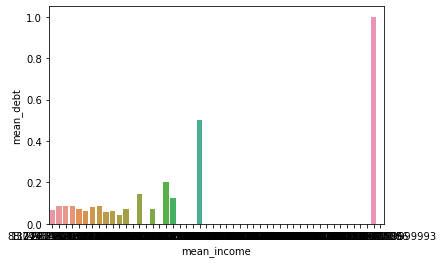

In [44]:
import seaborn as sbs
sbs.barplot(x=df_of_mean_debt['mean_income'], y=df_of_mean_debt['mean_debt'])

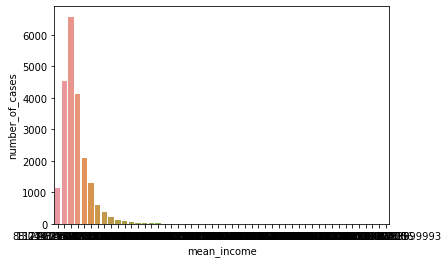

In [45]:
sbs.barplot(x=df_of_mean_debt['mean_income'], y=df_of_mean_debt['number_of_cases'])

**Вывод**

На основе обработки данных констатируем следующее:
* в итервале доходов до 250 т.р. проблемность кредитов максимальна (около 8%),
* в интервале от 250 до 750 т.р. проблемность понижается (около 5%),
* при уровне доходов свыше 750 т.р. проблемность возрастает до уровня в 10%, однако данные перестают быть статистичными (при уровне доходов свыше 500 т.р.), и в этом случае случае требуется индивидуальный подход к заемщикам,
* состав заемщиков по уровню дохода в целом соответствует нормальному распределению, но при детализации диапазона до 250 т.р. имеются выпадающие вверх пиковые значения в районе дохода 117-122 т.р., 172-177 т.р. и особенно 140-145 т.р. (очевидно, это следствие заполнения пропусков медианными значениями; но из трех этих интервалов только в первом наблюдается некоторое выпадение проблемности кредитов из соседних интервальных групп, что косвенно подтверждает приемлемость заполнения пропусков по медианам профессиональных групп).

Анализ диапазона до 250 т.р. показывает, что минимальная проблемность у наименее состоятельных заемщиков (доход до 35 т.р, проблемность 5%). Далее по мере роста дохода проблемность возрастает (уровень в 9% достигается при доходе от 90 т.р. и выше). Некоторое понижение проблемности начинается только с уровня доходов в 160 т.р. и неравномерно понижается до 5% к уровню дохода в 370 т.р. Неравномерность может быть объяснена постепенным снижением выборки (снижением статистичности).

Таким образом, скоринговые модели рационельно применять при уровне доходов не более 350 т.р.

**- Как разные цели кредита влияют на его возврат в срок?**

Цели кредитования являются категориальными сущностями. Наличие или отсутствие задолженности в каждом конкретном случае также является категориальной переменной. Однако в совокупности их числовыми значениями (0 и 1) можно оперировать. Так, усредненное значение по совокупности кредитов будет означать частоту просрочки в совокупности кредитов, то есть характеризуют меру невозврата в срок.

In [46]:
grouped_data = data.groupby('purpose_category').agg({'debt':['count', 'mean']})
print(grouped_data)

                   debt          
                  count      mean
purpose_category                 
автомобиль         4288  0.093284
недвижимость      10780  0.072356
образование        3997  0.092319
свадьба            2337  0.078306


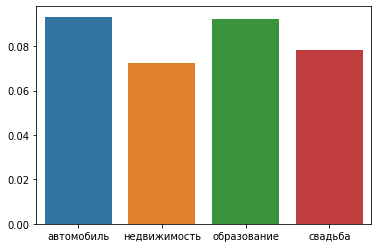

In [47]:
debts = list(grouped_data['debt']['mean'])
# print(debts)

goals = list(data['purpose_category'].unique())
goals_sorted = goals.sort()
# print(goals)

sbs.barplot(x=goals, y=debts)

**Вывод**

* Наименьшую надежность имеют автокредиты и кредиты на образование (доля просрочки 9,2-9,3%).
* Кредиты на свадьбу имеют значительно более высокую возвратность (доля просрочки только 7,8%).
* Наименее проблемны кредиты, связанные с недвижимостью (в том числе с жильем).

Банку следует учесть эти обстоятельства при диверсификации условий кредитования по этим категориям, в том числе в части процентной ставки и степени обеспеченности.

## Шаг 4. Общий вывод

1  Данные пригодны для целевой обработки за исключением 26% данных по трудовому стажу.

2  Уровень просрочки у бездетных заемщиков составляет около 7,5%, в то время как у заемщиков с детьми он составляет 9,0-9,5%. При этом склонность заемщиков к просрочке практически не зависит от количества име.ющихся у них детей. Соответственно, важен сам факт наличия и отсутствия детей, а детализация (количество детей) значения не имеют. Следовательно, на данном этапе вопрос о количестве детей в анкетах клиентов-заемщиков можно опустить.

3  Зависимость уровня просрочки от семейного положения имеет место. Наиболее проблемны неженатые и незамужние (9,8%). Близки к тим и те, кто не оформляют свои отношения, а живут в гражданском браке (9,3%). Учитывая повышенный риск кредитования у двух данных социальных групп, целесообразно предусмотреть для них в рамках скоринговой модели более жесткие условия (например, более высокую процентную ставку, более короткий срок кредитования, более высокий уровень обеспечения (если кредитование с залогом)). У остальных социальных групп уровень просрочки существенно ниже. 

4 а) Существует зависимость между уровнем дохода и возвратностью кредита. Наиболее проблемны заемщики с доходом ниже 250 т.р. В рамках скоринговой оценки для них целесообразно предусмотреть более жесткие условия. Причем сформировать их целесообразно не для всей группы, а с дифференциацией по шагам в 10 или 15 т. р. для более точного учета рисков (в соответствии с апроксимированой зависимостью величины дохода и уровня просрочки.

4 б) Группа заемщиков от 250 т.р. до 350 т.р. имеет сравнительно низкий риск просрочки. Условия для них могут быть наиболее комфортным.

4 в) Применять скоринговую модель для заемщиков с доходом свыше 350 т.р. нецелесообразно. В каждом из таких случаев следует применять индивидуальный подход и выдавать кредиты с более детальным учетом всех обстоятельств.

5 Наибольший риск просрочки имеет место при автокредитовании (9,3%) и кредитовании обучения (9,2%).Соответственно, в рамках скоринговой модели замещики, которые берут кредиты на эти цели, должны получать более жесткие условия (повышающие коэффициенты) в части процентных ставок и уменьшения сроков заимстовования. Соответствующие коээфиценты целосообразно выстраимвать в соответствии с пропроциями проблемности автокредитования, кредитования образования, займов на свадьбы и на всевозможные виды операций с недвижимостью (последние имеют наименьший риск - около 7,2%).

